# Portafolios de Inversión
## Tarea 5
José Armando Melchor Soto

---
### Librerías 



In [182]:
import pandas as pd 
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.optimize import minimize 

---

#### Indicaciones

$\hspace{0.5cm}$

**Punto 1. Optimización de Frontera Eficiente en Media Varianza (30%)**

Con el problema de optimización planteado para la frontera eficiente de portafolios en la última diapositiva de la presentación, **realiza la derivación analítica de la frontera**, utilizando el método de lagrange. Presenta tus resultados en formato latex.

*Hint:* Dado que tendrás dos restricciones de igualdad, es recomendable transformar el problema a su forma matricial, esto lo deberás de realizar después de derivar el lagrangiano e igualar las restricciones a cero. El resultado correcto es el siguiente.

$$w^*_{frontier} = \Sigma^{-1} R [R^T \Sigma^{-1} R]^{-1} P$$

donde $R_{nx2}=\begin{bmatrix} \mu & \overrightarrow{1}\end{bmatrix}$ y $P_{2x1}=\begin{bmatrix} \mu_p \\ 1 \end{bmatrix}$ y $\Sigma^{-1}_{nxn}$ es la inversa de la matriz cuadrada de varianza-covarianza

$\hspace{0.5cm}$

**Punto 2. Comprobación de Resultados Min Var y Max Sharpe (30%)**

+ Descarga el archivo de `data.xlsx` que subí a CANVAS, el cual contiene el histórico de los precios de cierre ajustado para `NVDA` y `AMZN`. Calcula los rendimientos diarios, utilizando el cambio porcentual. A posteriori, calcula el rendimiento esperado y la matriz de covarianza-varianza de los rendimientos diarios. Durante el ejercicio asume una tasa libre de riesgo ($r_f$) del $5\%$.


+ Con la información obtenida, calcula los pesos eficientes en mínima varianza y máximo de sharpe con la solución analítica obtenida en clase:

$$w_{min var} = \frac{\Sigma^{-1} \overrightarrow{1}}{\overrightarrow{1^T} \Sigma^{-1} \overrightarrow{1}}$$

$$w_{max sharpe} = \frac{\Sigma^{-1} (\mu - rf )}{\overrightarrow{1^T} \Sigma^{-1} (\mu - rf )}$$

+ Programa dos funciones para optimizar el portafolio en mínima varianza y máximo de sharpe utilizando la librería de `scipy.optimize.minimize`, utiliza las funciones para encontrar los pesos eficientes para el portafolio dado, deberás obtener los mismos resultados que con la solución analítica.

$\hspace{0.5cm}$

**Punto 3. Gráfica de Frontera Eficiente en Media Varianza (40%)**

Con los dos puntos anteriores, gráfica la frontera eficiente analítica para el portafolio dado, la gráfica deberá contener los siguientes elementos:

+ Hipérbole de Markowitz (*"Markowitz Bullet"*)  


+ Coordenadas de los activos individuales según su volatilidad y rendimiento.


+ Coordenadas de los portafolios eficientes en mínima varianza y máximo de sharpe


+ Hipérbole de la Frontera Eficiente de Portafolios.
  
  
A continuación se muestra el producto esperado.


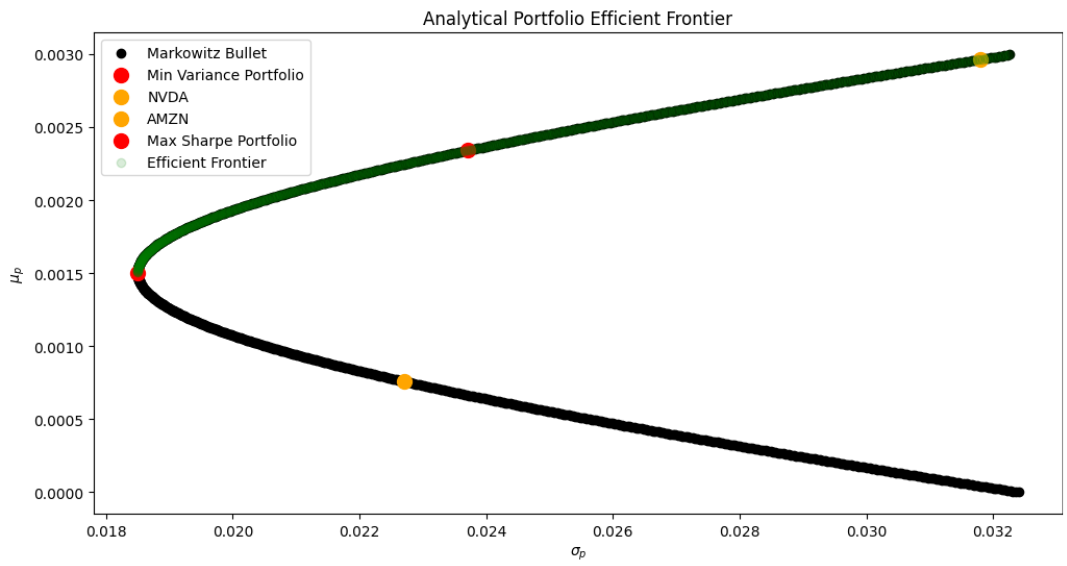

---

### **Solución**

#### Indicaciones


Resolver el siguiente problema de minimización utilizando optimización Lagrangiana
$$ min_x \sigma_{p}^{2} : w^T \sum w $$

Sujeto a : 
$$ w^T \vec{1} = 1$$
$$ w^T \mu = \mu_p$$

Considera:

$
w = \begin{bmatrix}
w_1  \\
\vdots \\
w_n
\end{bmatrix}
$
$
\mu = \begin{bmatrix}
\mu_1  \\
\vdots \\
\mu_n
\end{bmatrix}
$

$
\vec{1} = \begin{bmatrix}
1  \\
\vdots \\
1
\end{bmatrix}
$
$
\mu_p : cte
$

$
\Sigma = \begin{bmatrix}
\sigma_1^2 & \cdots & \sigma_{1n} \\
\vdots & \ddots & \vdots \\
\sigma_{n1} & \cdots & \sigma_n^2
\end{bmatrix}
$

#### **Punto 1. Optimización de Frontera Eficiente en Media Varianza**



##### 1. No se simplifica 

##### 2. Encontrar Lagraniano

$$ L = w^T \sum w + \lambda_{1} (w^T \vec{1} -1 ) + \lambda_{2} (w^T \mu - \mu_{p})$$

#### 3. Encontrar el Gradiente Lagrangiano

$$
\nabla_{L} = \begin{bmatrix}
\frac {\partial_{L}}{\partial_{w}} \\
\frac {\partial_{L}}{\partial_{\lambda_{1}}} \\
\frac {\partial_{L}}{\partial_{\lambda_{2}}} \\
\end{bmatrix} 
=
\begin{bmatrix}
2 \sum w - \lambda_{1} \vec{1} - \lambda_{2} \mu \\
w^T \vec{1} -1 \\
w^T \mu - \mu_{p} \\
\end{bmatrix} $$


#### 4. Igualar a cero y despejar 


 ---
 $$\boldsymbol{\frac {\partial_{L}}{\partial_{w}}}$$

$$2\Sigma w - \lambda_{1} \vec{1} - \lambda_{2} \mu = 0$$

$$2\Sigma w = \lambda_{1} \vec{1} + \lambda_{2} \mu $$

$$\Sigma w = \frac{1}{2}(\lambda_{1} \vec{1} + \lambda_{2} \mu) $$

$$ w = \frac{1}{2}(\lambda_{1} \vec{1} + \lambda_{2} \mu) (\Sigma^{-1}) $$

$$ w^{*} = \frac{\lambda_1}{2} \Sigma^{-1} \vec{1} + \frac{\lambda_2}{2} \Sigma^{-1} \mu $$

---
 $$\boldsymbol{\frac {\partial_{L}}{\partial_{\lambda_{1}}}}$$

$$w^T \vec{1} -1 = 0$$

$$ (\frac{\lambda_1}{2} \Sigma^{-1} \vec{1} + \frac{\lambda_2}{2} \Sigma^{-1} \mu )^T  \vec{1} -1 = 0$$

$$ \frac{\lambda_1}{2} \vec{1}^T \Sigma^{-1} \vec{1} + \frac{\lambda_2}{2} \mu^T \Sigma^{-1} \vec{1}  = 1$$ 

---

 $$\boldsymbol{\frac {\partial_{L}}{\partial_{\lambda_{2}}}}$$

$$w^T \vec{1} - \mu_p = 0$$

$$(\frac{\lambda_1}{2} \Sigma^{-1} \vec{1} + \frac{\lambda_2}{2} \Sigma^{-1} \mu )^T \mu - \mu_p = 0$$

$$\frac{\lambda_1}{2} \vec{1}^T \Sigma^{-1} \mu + \frac{\lambda_2}{2} \mu^T \Sigma^{-1} \mu = \mu_p$$ 


---

#### Reescribir en un sistema de eq.


$$
\frac{1}{2}
\begin{bmatrix}
\vec{1}^T \Sigma^{-1} \vec{1} & \vec{1}^T \Sigma^{-1} \mu \\
\mu^T \Sigma^{-1} \vec{1} & \mu^T \Sigma^{-1} \mu
\end{bmatrix}
\begin{bmatrix}
\lambda_1 \\
\lambda_2
\end{bmatrix}
=
\begin{bmatrix}
1 \\
\mu_p
\end{bmatrix}
$$





#### Se simplifica como :

$$\begin{bmatrix}
\vec{1}^T \\
\mu^T
\end{bmatrix}

\Sigma^{-1} \begin{bmatrix}
\vec{1} &\mu
\end{bmatrix}

\begin{bmatrix}
\lambda_1 \\
\lambda_2
\end{bmatrix}

= 

\begin{bmatrix}
1 \\
\mu_p \\
\end{bmatrix}

$$

#### Sea

$$ R= \begin{bmatrix}
\mu & 1 \\
\end{bmatrix} , 
P= \begin{bmatrix}
1 & \mu_p \\
\end{bmatrix}^T, \lambda= \begin{bmatrix}{\lambda_1 , \lambda_2} \\ \end{bmatrix}$$

#### Queda como 

$$\frac{1}{2} R^T \Sigma^{-1} R \lambda = P$$

#### Para Despejar $\lambda$

$$\lambda = \frac{2P}{R^T \Sigma^{-1} R} = 2\begin{bmatrix}{R^T \Sigma^{-1} R} \\ \end{bmatrix}^{-1} P$$


#### Sustituyendo en w , queda como 

$$w = \frac{1}{2} \Sigma^{-1} R \lambda 
= \frac{1}{2} \Sigma^{-1} R[2 \begin{bmatrix} {R^T \Sigma^{-1} R} \end{bmatrix}^{-1} P]$$

$$w = \Sigma^{-1} R \begin{bmatrix} {R^T \Sigma^{-1} R} \end{bmatrix}^{-1} P $$

#### Resultado para el problema de minimización 

$$w = \Sigma^{-1} R \begin{bmatrix} {R^T \Sigma^{-1} R} \end{bmatrix}^{-1} P $$

---

#### Tasa de Riesgo

In [183]:
rf = 0.05

#### **Punto 2. Comprobación de Resultados Min Var y Max Sharpe**

In [184]:
df = pd.read_excel('data.xlsx', index_col=0)
df

,NVIDIA,AMAZON
Date,,
2020-01-02,1128.7457,1784.4595
2020-01-03,1123.6036,1774.5305
2020-01-06,1115.4385,1791.7005
2020-01-07,1124.2710,1800.0000
2020-01-08,1129.8680,1785.6820
...,...,...
2024-03-20,15040.0996,3047.9299
2024-03-21,15311.4102,3047.9299
2024-03-22,15800.7305,3047.9299


In [185]:
primera = df.index[0]
ultima = df.index[-1]

primera, ultima

(Timestamp('2020-01-02 00:00:00'), Timestamp('2024-03-26 00:00:00'))

In [186]:
rets = df.pct_change().dropna()
rets.head()

,NVIDIA,AMAZON
Date,,
2020-01-03,-0.004556,-0.005564
2020-01-06,-0.007267,0.009676
2020-01-07,0.007918,0.004632
2020-01-08,0.004978,-0.007954
2020-01-09,0.008298,0.003201


$$ R= \begin{bmatrix}
\mu & 1 \\
\end{bmatrix} , 
P= \begin{bmatrix}
1 & \mu_p \\
\end{bmatrix}^T, \lambda= \begin{bmatrix}{\lambda_1 , \lambda_2} \\ \end{bmatrix}$$

In [187]:
ret_mean = rets.mean()
ret_mean

NVIDIA    0.002965
AMAZON    0.000759
dtype: float64

In [188]:
cov = rets.cov()
cov

,NVIDIA,AMAZON
NVIDIA,0.001011,0.000002
AMAZON,0.000002,0.000516


In [189]:
n= len(rets.keys())
ones = np.ones(n)/n
ones

array([0.5, 0.5])

---

#### Portafolio de Minima Varianza 

In [190]:
def opt_min_var(rets: pd.DataFrame) -> np.ndarray:
    # Obtener matriz de covariânza varianza
    cov = rets.cov()
    # Definir funcion objetivo
    varianza = lambda w: w.T @ cov @ w
    # Definir valores iniciales
    n = len(rets.keys())
    w_inicial = np.ones(n) / n
    # Definir las cotas
    bounds = [(0, 1)] * n
    # Definir las restricciones
    restr = lambda w: sum(w)-1
    # Definir tolerancia
    tol = 1e-100
    # Aplicar función de scipy.optimize
    min_var = minimize(
        fun=varianza,
        x0=w_inicial,
        bounds=bounds,
        constraints={'fun': restr, 'type': 'eq'},
        tol=tol
    )
    # Encontrar pesos eficientes 
    w_minvar = min_var.x
    
    return w_minvar

In [191]:
w_minvar = opt_min_var(rets)
dict(zip(rets.keys(), w_minvar))

{'NVIDIA': 0.3373801786356356, 'AMAZON': 0.6626198213643644}

#### Con la fórmula 

$$w_{min var} = \frac{\Sigma^{-1} \overrightarrow{1}}{\overrightarrow{1^T} \Sigma^{-1} \overrightarrow{1}}$$



In [192]:
def opt_min(rets: pd.DataFrame) -> np.ndarray:
    cov = rets.cov().values
    n = cov.shape[0]
    
    ones = np.ones((n, 1))
    cov_inv = np.linalg.inv(cov)
    
    w = (cov_inv @ ones) /(ones.T @ cov_inv @ ones)  
    
    w_minvar = w 
    
    return w_minvar
w_minvar0 = opt_min(rets)

dict(zip(rets.keys(),w_minvar0.flatten()))

{'NVIDIA': 0.33738018212450493, 'AMAZON': 0.6626198178754951}

Se obtienen los mismos resultados que en la primera función hecha, nomas varia por decimales. 


#### Rendimiento con los pesos de Mínima Varianza

In [ ]:
rend_minvar = w_minvar.T @ (rets.mean())
rend_minvar*100

0.15030657862745597

#### Volatilidad con los pesos de Mínima Varianza

In [ ]:
vol_minvar = np.sqrt(w_minvar.T @ cov @ w_minvar)
vol_minvar*100

1.8499542511070581

---

#### Con el Resultado para el problema de minimización 

$$w = \Sigma^{-1} R \begin{bmatrix} {R^T \Sigma^{-1} R} \end{bmatrix}^{-1} P $$

$$ R= \begin{bmatrix}
\mu & 1 \\
\end{bmatrix} , 
P= \begin{bmatrix}
1 & \mu_p \\
\end{bmatrix}^T, \lambda= \begin{bmatrix}{\lambda_1 , \lambda_2} \\ \end{bmatrix}$$

In [287]:
def optw(rets: pd.DataFrame, rend_esp: float) -> np.ndarray:
    cov = rets.cov().values                         
    ret_mean = rets.mean().values.reshape(-1, 1)    
    n = cov.shape[0]
    
    ones = np.ones((n, 1))
    cov_inv = np.linalg.inv(cov)

    R = np.hstack([ret_mean, ones ])                 
    P = np.array([[1],[rend_esp] ])  
    
    middle = np.linalg.inv(R.T @ cov_inv @ R)       
    w_0 = cov_inv @ R @ middle @ P                    
    
    return w_0.flatten()

rend_esp = 0.05  
min_opw = optw(rets, rend_esp)

dict(zip(rets.columns, min_opw))

{'NVIDIA': 453.2894370954405, 'AMAZON': -453.23943709544073}


#### Rendimiento con los pesos del problema de minimización 

In [279]:
rend_solmin = min_opw.T @ (rets.mean())
rend_solmin*100

100.0

#### Volatilidad con los pesos del problema de minimización 

In [282]:
vol_solmin = np.sqrt(min_opw.T @ cov @ min_opw)
vol_solmin*100

1769.5639693715143

---

#### Tasa libre de riesgo

In [196]:
rf = 0.05

#### Portafolio de Máximo Sharpe

In [197]:
def max__sharpe(ret:pd.DataFrame,rf:float)-> np.array:

    # Input 
    E= ret.mean()
    cov = ret.cov()
    rf = rf/252

    # Función objetivo para maximizar la ratio de Sharpe
    sharpe = lambda w: -((w.T @ (E - rf)) / np.sqrt(w.T @ cov @ w))
    
    # Valores iniciales
    n = len(ret.keys())
    w_inicial = np.ones(n)/n
    # Cotas
    bounds = [(0,1)]*n
    # Restricciones
    rest = lambda w: sum(w)-1
    # Tolerancia
    tol = 1e-100

    # Optimización
    max_sharpe = minimize(
        fun=sharpe,
        x0=w_inicial,
        bounds=bounds,
        constraints={'fun': rest, 'type': 'eq'},
        tol=tol)
    
    w_max = max_sharpe.x

    return w_max

In [198]:
w_max = max__sharpe(rets, rf).round(4)
dict(zip(rets.keys(),w_max))

{'NVIDIA': 0.7171, 'AMAZON': 0.2829}

#### Con la fórmula obtenida en clase

$$w_{max sharpe} = \frac{\Sigma^{-1} (\mu - rf )}{\overrightarrow{1^T} \Sigma^{-1} (\mu - rf )}$$


In [199]:
def w_maxsha(rets: pd.DataFrame,rf:float ) -> np.ndarray:
    cov = rets.cov().values 
    n = cov.shape[0]
    ones = np.ones((n, 1))
    cov_inv = np.linalg.inv(cov)
    rf = rf / 252  
    
    w = (cov_inv @ (ret_mean - rf)) / (ones.T @ cov_inv @ (ret_mean - rf ))

    w_maxsharpe = w 
    
    return w_maxsharpe
    w_maxsharpe0 = w_maxsha(rets)

w_maxsharpe0 = w_maxsha(rets, rf).round(4)
dict(zip(rets.keys(), w_maxsharpe0.flatten()))


{'NVIDIA': 0.7171, 'AMAZON': 0.2829}

Se obtuvieron los mismos resultados en la analitica y en la de scipy.

---

#### Rendimiento con los pesos de Máximo Sharpe

In [200]:
rend_max_sharpe = w_max.T @ (rets.mean())
rend_max_sharpe*100

0.2340732371247127

#### Volatilidad con pesos de Máximo Sharpe 

In [201]:
vol_max_sharpe = np.sqrt(w_max.T @ cov @ w_max)
vol_max_sharpe*100

2.370630280742642

---

#### **Punto 3. Gráfica de Frontera Eficiente en Media Varianza**

In [202]:
n = len(rets.keys())
np_port = 10000
random_w = np.random.dirichlet(np.ones(n), np_port)
# Calcular rendimientos y volatilidades
rend_aleatorios = [ret_mean.T @ random_w[w] for w in range(np_port)]
vol_aleatorios = [np.sqrt(random_w[w].T @ cov @ random_w[w]) for w in range(np_port)]

C:\Users\ppmel\AppData\Local\Temp\ipykernel_20360\4059245144.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(ind_vol[i], ind_rend[i], marker='o', color= 'black', s=100)
C:\Users\ppmel\AppData\Local\Temp\ipykernel_20360\4059245144.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(ind_vol[i], ind_rend[i], df.keys()[i], fontsize=12,  color= 'black')


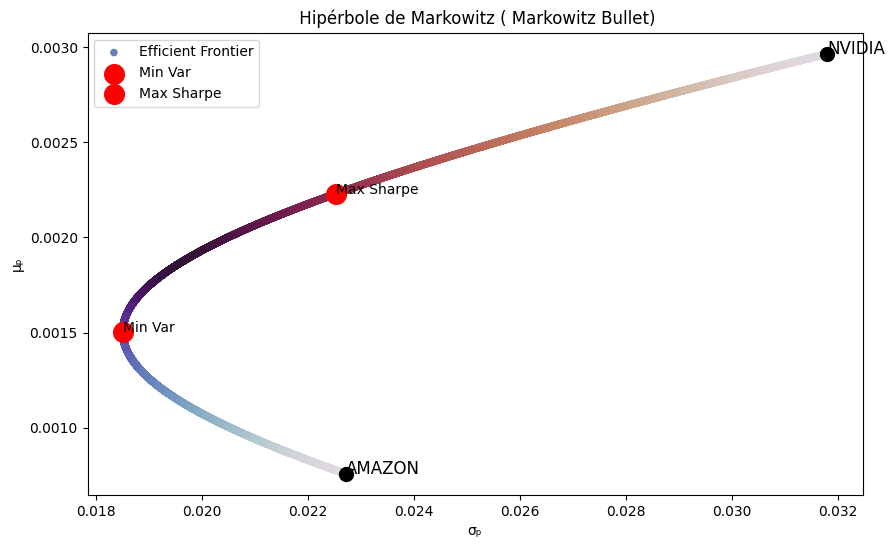

In [284]:

# Realizar grafica
plt.figure(figsize=(10,6))
# Scatter plot de portafolios aleatorios
plt.scatter(vol_aleatorios, rend_aleatorios,c= rend_aleatorios, cmap='twilight', s=20, alpha=1, label='Efficient Frontier')

# Scatter plot de Minima Varianza
plt.scatter(vol_minvar, rend_minvar, color='red', s=200, label='Min Var')
plt.text(vol_minvar, rend_minvar, 'Min Var', fontsize=10, color = 'black')

# Scatter plot de Maximo de Sharpe
plt.scatter(vol_max_sharpe, rend_max_sharpe, color='red', s=200, label='Max Sharpe')
plt.text(vol_max_sharpe, rend_max_sharpe, 'Max Sharpe', fontsize=10, color = 'Black')


#plt.scatter(vol_solmin, rend_solmin, color='red', s=200, label='Sol Min')

plt.xlabel('\u03C3\u209A')
plt.ylabel('\u03BC\u209A' )
plt.title(' Hipérbole de Markowitz ( Markowitz Bullet)') 


ind_rend = rets.mean()
ind_vol = rets.std()

for i in range(n):
    plt.scatter(ind_vol[i], ind_rend[i], marker='o', color= 'black', s=100)
    plt.text(ind_vol[i], ind_rend[i], df.keys()[i], fontsize=12,  color= 'black')
    plt.legend()
    plt.grid()

plt.show()